In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [270]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [271]:
print(f"train missing:") 
print(train.isna().sum()/len(train)*100)
print()
print(f"train missing:") 
print(test.isna().sum()/len(test)*100)

train missing:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

train missing:
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


In [272]:
# copy train set to work in
df = train.copy()

#### As preprocessing I mainly want to focus on possible issues within the data (missings, outliers, impossibles, impractical variables) and then let the modeling phase show which variables are important

In [273]:
# descriptives per column
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [274]:
# cabin has quite some unique values (147), so thats difficult to analyze, but I want to try and aggregate them
# on area (A, B, C, D, etc) and give missings their own category
df['Cabin_area'] = df['Cabin'].str.extract(r'([A-Za-z])')
df['Cabin_area'] = df['Cabin_area'].fillna('MISS')
df = df.drop(['Cabin'], axis=1)

# resulting df 
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_area
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,MISS
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,MISS
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,MISS


In [275]:
from sklearn.impute import KNNImputer
# impute missings

# fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# fill Fare with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Initialize the KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)  # You can adjust the value of n_neighbors as needed
# Perform KNN imputation on the 'Age' column
df['Age'] = imputer.fit_transform(df[['Age']])


In [276]:
# Outliers
df.loc[df['Fare']>512, 'Fare'] = 263
df['Fare'].sort_values(ascending=False).head(5)

258    263.0
88     263.0
27     263.0
341    263.0
737    263.0
Name: Fare, dtype: float64

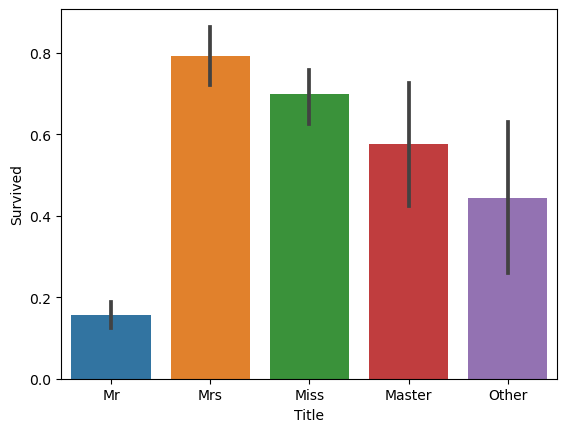

In [277]:
# We can group the Name variable based on Title
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess', 
                                   'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'], 'Other')
# Title seems to be a indicator of survival
sns.barplot(x='Title', y='Survived', data=df)
plt.show()

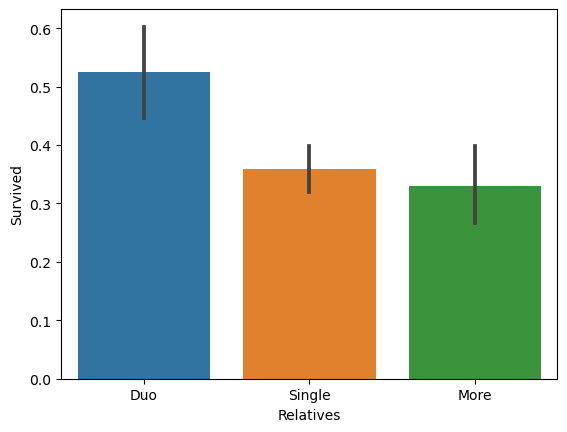

In [278]:
# We can group the 'Names' variable based on surname and count the number of relatives on board. 
df['Last_Name'] = df['Name'].str.split(',').str[0].str.strip()
df['Relatives'] = df.groupby('Last_Name')['Last_Name'].transform('count')
df = df.drop(['Last_Name'], axis=1)

df['Relatives'] = df['Relatives'].replace([1, 2, [3,4,5,6,7,8,9,10]], ['Single', 'Duo', 'More'])

# Title seems to be a indicator of survival
sns.barplot(x='Relatives', y='Survived', data=df)
plt.show()

In [279]:
# to clean the data further I want to one-hot encode all categorical/object variables
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Cabin_area', 'Title', 'Relatives']
encoded_cols = encoder.fit_transform(df[categorical_cols])

# Create a new DataFrame with the encoded columns
df_encoded = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame

# Check if 'Cabin_area_T' exists in the DataFrame
if 'Cabin_area_T' in df.columns:
    # Drop 'Cabin_area_T' if it exists
    df = pd.concat([df.drop(categorical_cols, axis=1), df_encoded.drop(['Cabin_area_T'], axis=1)], axis=1)
else:
    # Continue without dropping 'Cabin_area_T'
    df = pd.concat([df.drop(categorical_cols, axis=1), df_encoded], axis=1)

# show dataframe
df.head()
print(df.columns)

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Cabin_area_B', 'Cabin_area_C', 'Cabin_area_D', 'Cabin_area_E',
       'Cabin_area_F', 'Cabin_area_G', 'Cabin_area_MISS', 'Cabin_area_T',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Relatives_More',
       'Relatives_Single'],
      dtype='object')


#### Now we proceed with modeling

In [280]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked_S',
       'Cabin_area_B', 'Cabin_area_C', 'Cabin_area_D', 'Cabin_area_E',
       'Cabin_area_F', 'Cabin_area_G', 'Title_Other', 'Embarked_Q', 'Title_Mrs'], axis=1)

In [281]:
# we can iteratively use this code to test feature engineering steps
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create copy file
df_clean = df.copy()

# create train test split
features = list(df_clean.drop(['Survived'], axis=1))
X_train, X_val, y_train, y_val = train_test_split(df_clean[features],df_clean['Survived'],train_size=0.7, random_state=12)
print(f"X_train.shape = {X_train.shape}, X_val.shape = {X_val.shape}")
print(f"y_train.shape = {y_train.shape}, y_val.shape = {y_val.shape}")

# fit model
rf = RandomForestClassifier(random_state=9)
rf.fit(X_train, y_train)

# show importances
importance = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance':importance})
feature_importances = feature_importances.sort_values(by='Importance', ascending = False)
print(feature_importances)

# show accuracy
y_pred = rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

X_train.shape = (623, 13), X_val.shape = (268, 13)
y_train.shape = (623,), y_val.shape = (268,)
             Feature  Importance
3               Fare    0.234322
0                Age    0.215326
10          Title_Mr    0.144634
6           Sex_male    0.142094
5           Pclass_3    0.053013
9         Title_Miss    0.040086
1              SibSp    0.039397
7    Cabin_area_MISS    0.035205
2              Parch    0.032502
4           Pclass_2    0.023911
12  Relatives_Single    0.020987
11    Relatives_More    0.018523
8       Cabin_area_T    0.000000
Accuracy: 0.7835820895522388


In [282]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
# create copy file
df_clean = df.copy()

# create train test split
features = list(df_clean.drop(['Survived'], axis=1))
X_train, X_val, y_train, y_val = train_test_split(df_clean[features],df_clean['Survived'],train_size=0.7, random_state=12)
print(f"X_train.shape = {X_train.shape}, X_val.shape = {X_val.shape}")
print(f"y_train.shape = {y_train.shape}, y_val.shape = {y_val.shape}")

# fit model
rf = RandomForestClassifier(random_state=9)

# param grid
grid_param = {
 'n_estimators': [100, 200, 300],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False],
}
gd_sr = GridSearchCV(estimator=rf,
 param_grid=grid_param,
 scoring='accuracy',
 cv=5,
 n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)

# train model on optimized parameters
final_model = RandomForestClassifier(bootstrap= False, criterion= 'entropy', min_samples_leaf= 1, 
                               min_samples_split= 10, n_estimators= 200, random_state=9)

# get accuracy scores
all_accuracies = cross_val_score(estimator=final_model, X=X_train, y=y_train, cv=5)
all_accuracies
all_accuracies.mean()

X_train.shape = (623, 13), X_val.shape = (268, 13)
y_train.shape = (623,), y_val.shape = (268,)
{'bootstrap': False, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 300}


0.8442838709677419